In [1]:
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'figure.dpi': 300,
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
          'legend.fontsize': 'xx-large',
         'font.size': 11,
          'font.family': 'serif',
          "mathtext.fontset": "dejavuserif",
         'axes.titlepad': 12,
        'axes.labelpad': 12}
plt.rcParams.update(params)

In [2]:
n_cells = [625, 1250, 2500, 4900, 10000]
t_box = [31.1, 61, 128, 258, 602]
t_np = [2.53, 9.49, 39.4, 149, 615]
t_cp = [0.506, 0.914, 2.62, 10.4, 30]

In [3]:
t_box_reg = scs.linregress(np.log(n_cells), np.log(t_box))
t_np_reg = scs.linregress(np.log(n_cells), np.log(t_np))
t_cp_reg = scs.linregress(np.log(n_cells), np.log(t_cp))

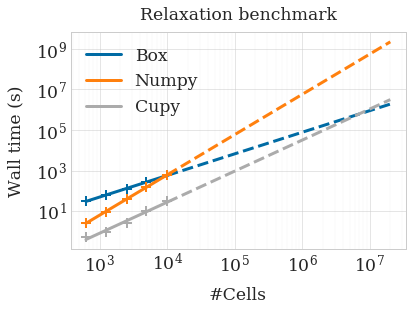

In [6]:
x = np.logspace(np.log10(n_cells[-1]), np.log10(20000000))

plt.plot(n_cells, t_box, '+', color='C0', mew=2, ms=10)
plt.plot(n_cells, np.exp(np.log(n_cells)*t_box_reg.slope + t_box_reg.intercept), '-', color='C0', label='Box')
plt.plot(x, np.exp(np.log(x)*t_box_reg.slope + t_box_reg.intercept), '--', color='C0')

plt.plot(n_cells, t_np, '+', color='C1', mew=2, ms=10)
plt.plot(n_cells, np.exp(np.log(n_cells)*t_np_reg.slope + t_np_reg.intercept), '-', color='C1', label='Numpy')
plt.plot(x, np.exp(np.log(x)*t_np_reg.slope + t_np_reg.intercept), '--', color='C1')

plt.plot(n_cells, t_cp, '+', color='C2', mew=2, ms=10)
plt.plot(n_cells, np.exp(np.log(n_cells)*t_cp_reg.slope + t_cp_reg.intercept), 'C2', label='Cupy')
plt.plot(x, np.exp(np.log(x)*t_cp_reg.slope + t_cp_reg.intercept), '--', color='C2')

plt.xscale('log')
plt.xlabel('#Cells')
plt.ylabel('Wall time (s)')
plt.title('Relaxation benchmark')
plt.yscale('log')
plt.grid(True, 'minor', linewidth=0.1)
plt.grid(True, 'major', linewidth=0.5)
plt.legend(loc=0)

plt.savefig("RelaxBenchmark.jpg", dpi=300)